In [1]:
# 凸性
''' 
凸性（convexity）在优化算法的设计中起到⾄关重要的作⽤，这主要是由于在这种情况下对算法进⾏分析和
测试要容易得多。换⾔之，如果该算法甚⾄在凸性条件设定下的效果很差，通常我们很难在其他条件下看到
好的结果。此外，即使深度学习中的优化问题通常是⾮凸的，它们也经常在局部极⼩值附近表现出⼀些凸性。
这可能会产⽣⼀些像 [Izmailov et al., 2018]这样⽐较有意思的新的优化变体
'''
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

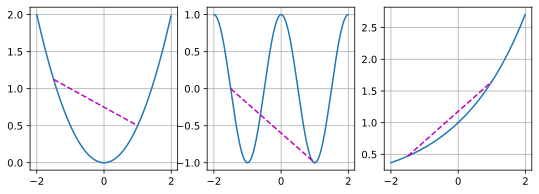

In [2]:
# 定义
'在进⾏凸分析之前，我们需要定义凸集（convex sets）和凸函数（convex functions）'
f = lambda x: 0.5 * x**2
# 凸函数
g = lambda x: torch.cos(np.pi * x)
# ⾮凸函数
h = lambda x: torch.exp(0.5 * x)
# 凸函数
x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)


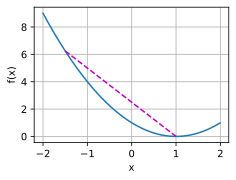

In [3]:
# 局部极⼩值是全局极⼩值
f = lambda x: (x - 1) ** 2
d2l.set_figsize()
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

In [ ]:
''' 
⼩结
在深度学习的背景下，凸函数的主要⽬的是帮助我们详细了解优化算法。我们由此得出梯度下降法和随机梯
度下降法是如何相应推导出来的
• 凸集的交点是凸的，并集不是
• 根据詹森不等式，"⼀个多变量凸函数的总期望值”⼤于或等于“⽤每个变量的期望值计算这个函数的总值"
• ⼀个⼆次可微函数是凸函数，当且仅当其Hessian（⼆阶导数矩阵）是半正定的
• 凸约束可以通过拉格朗⽇函数来添加。在实践中，只需在⽬标函数中加上⼀个惩罚就可以了
• 投影映射到凸集中最接近原始点的点
'''